In [1]:
import os 
import cv2
import time
import random
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

In [18]:
parentDir = "/Users/calvin/Documents/NUIG/Thesis/Movies"

actions = ['handshake', 'waving', 'yawning', 'walking', 'bowing', 'punching', 'standing', 'sitting', 'touchinghead', 'defending', 'reachingup']
video_info = []
for action in actions:
    actionFolder = os.path.join(parentDir, action)
    for videoFile in os.listdir(actionFolder):
        if videoFile.split(".")[-1].lower() == "mp4":
            video = cv2.VideoCapture(os.path.join(actionFolder, videoFile))
            video_info.append([action, videoFile, video.get(cv2.CAP_PROP_FRAME_COUNT)])
        
video_info = pd.DataFrame(video_info)
video_info.columns = ["class", "file", "frames"]
video_info

,class,file,frames
0,handshake,handshake_120.MP4,216.0
1,handshake,handshake_134.MP4,196.0
2,handshake,handshake_108.MP4,214.0
3,handshake,handshake_109.MP4,243.0
4,handshake,handshake_135.MP4,220.0
...,...,...,...
496,reachingup,reachingup_100.MP4,210.0
497,reachingup,reachingup_128.MP4,234.0
498,reachingup,reachingup_129.MP4,222.0
499,reachingup,reachingup_101.MP4,222.0


In [3]:
video_info["frames"].value_counts()

216.0    38
209.0    31
215.0    27
213.0    23
208.0    22
         ..
174.0     1
191.0     1
197.0     1
236.0     1
287.0     1
Name: frames, Length: 80, dtype: int64

In [4]:
sorted(video_info["frames"].values, reverse=True)[:10]

[296.0, 289.0, 287.0, 279.0, 275.0, 267.0, 260.0, 257.0, 255.0, 255.0]

In [5]:
video_info[video_info["frames"]>=295.0]

,class,file,frames
420,defending,defending_121.MP4,296.0


In [6]:
video_info[video_info["frames"] > 216]

,class,file,frames
3,handshake,handshake_109.MP4,243.0
4,handshake,handshake_135.MP4,220.0
5,handshake,handshake_121.MP4,217.0
6,handshake,handshake_137.MP4,223.0
7,handshake,handshake_123.MP4,218.0
...,...,...,...
495,reachingup,reachingup_114.MP4,218.0
497,reachingup,reachingup_128.MP4,234.0
498,reachingup,reachingup_129.MP4,222.0
499,reachingup,reachingup_101.MP4,222.0


## Load KeyPoint dataset

In [7]:
video.get(cv2.CAP_PROP_FRAME_WIDTH), video.get(cv2.CAP_PROP_FRAME_HEIGHT), video.get(cv2.CAP_PROP_FRAME_WIDTH) * 0.5 , video.get(cv2.CAP_PROP_FRAME_HEIGHT) * 0.5

(1920.0, 1080.0, 960.0, 540.0)

In [2]:
def standardize(frame):
    mean = np.mean(frame, axis=0)
    std = np.std(frame, axis=0)+0.000001

    frame = (frame - mean) / std
    return frame

In [3]:
def load_keyPoints(flatten=False, scale=False):
    dataset, labels, label_track = [], [], 0
    parent_dir = "/Users/calvin/Documents/NUIG/Thesis/gesture-estimator/extractedData/"
    actions = ['handshake', 'waving', 'yawning', 'walking', 'bowing', 'punching', 'standing', 'sitting', 'touchinghead', 'defending', 'reachingup']
    for action in actions:
        label_track += 1
        files = os.listdir(os.path.join(parent_dir, action))
        files.remove(".DS_Store") if ".DS_Store" in files else files
        for video_file in files:
            video_file = np.load(os.path.join(parent_dir, action, video_file))
            flattened_video = []
            for frame in video_file:
                if flatten:
                    frame = frame.reshape(-1)
                if scale:
                    frame[:, [4, 8, 12, 16, 20]] = standardize(frame[:, [4, 8, 12, 16, 20]])
                    frame[:, [5, 9, 13, 17, 21]] = standardize(frame[:, [5, 9, 13, 17, 21]])
                    frame[:, [6, 10, 14, 18]]    = standardize(frame[:, [6, 10, 14, 18]])
                    frame[:,  7] = standardize(frame[:,  7])
                    frame[:, 11] = standardize(frame[:, 11])
                    frame[:, 15] = standardize(frame[:, 15])
                    frame[:, 19] = standardize(frame[:, 19])
                flattened_video.append(frame)
            flattened_video = np.array(flattened_video)
            dataset.append(np.array(flattened_video))
            labels.append(label_track)
    # print("Max distance value:", max_7, max_11, max_15, max_19)
    return dataset, labels, frame

master_dataset, master_labels, frame = load_keyPoints(flatten=False, scale=True)

In [4]:
test = ["x", "y", "z", "v", "xn", "yn", 'a0', 'd0', 'mx0', 'my0', 'a15', 'd15', 
        'mx15', 'my15','a16', 'd16', 'mx16', 'my16', 'a33', 'd33', 'mx33', 'my33']

indx = [4, 5, 8, 9, 12, 13, 16, 17, 20, 21]

xidx = [4, 8, 12, 16, 20]
yidx = [5, 9, 13, 17, 21]
aidx = [6, 10, 14, 18]
didx = [7, 11, 15, 19]


In [5]:
sample_df = pd.DataFrame(master_dataset[0][0])
sample_df.columns = ["x", "y", "z", "v", "xn", "yn", 'a0', 'd0', 'mx0', 'my0', 'a15', 'd15', 
                     'mx15', 'my15','a16', 'd16', 'mx16', 'my16', 'a33', 'd33', 'mx33', 'my33']
sample_df

,x,y,z,v,xn,yn,a0,d0,mx0,my0,...,mx15,my15,a16,d16,mx16,my16,a33,d33,mx33,my33
0,0.551495,0.205116,-0.424,1.000,0.001562,-1.137876,0.434262,-0.777334,0.171130,-0.963548,...,0.174312,-0.832460,0.972849,1.270443,0.175686,-0.834039,1.111587,1.242218,0.166185,-0.841108
1,0.559740,0.184547,-0.414,1.000,0.216203,-1.215272,1.845613,-0.284249,0.214960,-1.027136,...,0.215902,-0.889708,0.972849,1.383979,0.222171,-0.891326,1.111587,1.368844,0.210071,-0.898695
2,0.564187,0.184015,-0.414,1.000,0.331988,-1.217274,1.845613,-0.284249,0.236875,-1.027136,...,0.236697,-0.889708,0.972849,1.383979,0.245414,-0.891326,1.111587,1.368844,0.232014,-0.898695
3,0.567492,0.183304,-0.414,1.000,0.418038,-1.219949,1.881801,-0.284249,0.258790,-1.039854,...,0.247094,-0.901158,0.972849,1.394300,0.257035,-0.902784,1.111587,1.380355,0.253957,-0.898695
4,0.544446,0.184139,-0.413,1.000,-0.181967,-1.216808,0.940901,-0.185632,0.138258,-1.027136,...,0.132721,-0.889708,0.972849,1.383979,0.129201,-0.891326,1.083446,1.368844,0.133271,-0.898695
5,0.539577,0.183082,-0.413,1.000,-0.308734,-1.220785,0.470450,-0.037707,0.105385,-1.039854,...,0.111926,-0.901158,0.972849,1.394300,0.105959,-0.902784,1.055304,1.380355,0.111328,-0.910213
6,0.536726,0.181791,-0.413,1.000,-0.382944,-1.225645,0.289508,0.060911,0.094428,-1.039854,...,0.101529,-0.901158,0.972849,1.394300,0.082716,-0.902784,1.027163,1.391867,0.089385,-0.910213
7,0.574541,0.185730,-0.307,1.000,0.601537,-1.210823,1.845613,-0.333558,0.291663,-1.027136,...,0.288685,-0.889708,0.972849,1.373658,0.303520,-0.891326,1.111587,1.357333,0.286871,-0.898695
8,0.533537,0.186116,-0.303,1.000,-0.465989,-1.209369,-0.108565,0.159528,0.072513,-1.027136,...,0.080734,-0.889708,0.972849,1.373658,0.071095,-0.891326,0.999021,1.368844,0.078414,-0.898695
9,0.560721,0.224587,-0.380,1.000,0.241754,-1.064612,0.434262,-0.777334,0.214960,-0.887242,...,0.215902,-0.763762,0.972849,1.156908,0.222171,-0.765294,1.111587,1.115593,0.221042,-0.772004


## Frame InterPolation

In [6]:
def frame_interpolation(video, limit):
    output_video, count = [], 0
    if video.shape[0] < limit:
        while count < limit - video.shape[0]:
            output_video.append(video[count])
            output_video.append(video[count])
            count += 1
        while count < video.shape[0]:
            output_video.append(video[count])
            count += 1
    else:
        while count < 2* (video.shape[0] - limit):
            if count % 2 == 0:
                output_video.append(video[count])
            count += 1
        while count < video.shape[0]:
            output_video.append(video[count])
            count += 1
    return np.array(output_video)    
        
dataset = []
for video in master_dataset:
    dataset.append(frame_interpolation(video, 216))
master_dataset = dataset

## Flatten Data

In [7]:
def flatten_dataset(dataset, level=1):
    reshapped_dataset = []
    for video in dataset:
        if level == 1:
            reshapped_dataset.append(video.reshape(216, 748))
        elif level == 2:
            reshapped_dataset.append(video.reshape(1, 161568))
    return reshapped_dataset


## One-Hot Encoding

In [8]:
def encode_labels(labels):
    encoded_labels = []
    for label in labels:
        tmp = np.zeros(11)
        tmp[label-1] = 1
        encoded_labels.append(tmp)
    return encoded_labels


## Shuffle Data

In [9]:
def shuffle_dataset(dataset, labels):
    shuffledDataset = list(zip(dataset, labels))
    random.shuffle(shuffledDataset)
    return shuffledDataset

## Train Test Split

In [10]:
def train_test_split(shuffledDataset, train_test_ratio = 0.8, flatten_label=False):

    train_test_ratio = round(len(shuffledDataset) * train_test_ratio)
    train, train_label = zip(*shuffledDataset[:train_test_ratio])
    test , test_label  = zip(*shuffledDataset[train_test_ratio:])

    assert len(train) + len(test) == len(shuffledDataset)
    
    train = np.array(train)
    train_label = np.array(train_label)
    
    test = np.array(test)
    test_label = np.array(test_label)
    
    if not flatten_label:
        train_label = train_label.reshape(train.shape[0], 1, 11)
        test_label = test_label.reshape(test.shape[0], 1, 11)
    
    print("Train dataset shape :", train.shape)
    print("Test dataset shape  :", test.shape)
    print("Train label shape   :", train_label.shape)
    print("Test label shape    :", test_label.shape)
    
    return train, train_label, test, test_label

## Train Wrapper

In [52]:
def train_wrapper(model, train, train_label, epochs, callbacks=[]):
    start_timer = time.perf_counter()
    history = model.fit(train, train_label, epochs=epochs, callbacks=callbacks)
    print("Training time: {}".format(time.perf_counter() - start_timer))
    fig, ax = plt.subplots(1)
    fig2, ax2 = plt.subplots(1)
    ax.plot(pd.DataFrame(history.history["loss"], columns=["loss"]), color="red")
    ax2.plot(pd.DataFrame(history.history["categorical_accuracy"], columns=["categorical accuracy"])) 
    return model

## Accuracy

In [111]:
def calculate_accuracy(model, test, test_label, cmap="inferno"):
    start = time.perf_counter()
    df = pd.DataFrame(np.zeros((11, 11)), columns=actions, index=actions)
    predicted = model.predict(test)
    counter = 0
    for i in range(predicted.shape[0]):
        df.iloc[np.argmax(test_label[i]), np.argmax(predicted[i])] += 1 
        if actions[np.argmax(predicted[i])] == actions[np.argmax(test_label[i])]:
            counter +=1     
    print("Accuracy: {}".format(counter/test.shape[0]))
    print("Prediction time for {} samples : {}s".format(test_label.shape[0], round(time.perf_counter() - start), 2))

    return df.style.background_gradient(cmap=cmap)

## LSTM Neural Network

In [119]:
dataset = flatten_dataset(master_dataset, level=1)
labels  = encode_labels(master_labels)
dataset = shuffle_dataset(dataset, labels)
train, train_label, test, test_label = train_test_split(dataset, train_test_ratio = 0.8, flatten_label=True)

Train dataset shape : (401, 216, 748)
Test dataset shape  : (100, 216, 748)
Train label shape   : (401, 11)
Test label shape    : (100, 11)


Epoch 1/50
13/13 [==============================] - 4s 187ms/step - loss: 2763.1460 - categorical_accuracy: 0.1172
Epoch 2/50
13/13 [==============================] - 2s 187ms/step - loss: 3605.4822 - categorical_accuracy: 0.1172
Epoch 3/50
13/13 [==============================] - 2s 187ms/step - loss: 2677.9839 - categorical_accuracy: 0.1047
Epoch 4/50
13/13 [==============================] - 2s 186ms/step - loss: 1362.0342 - categorical_accuracy: 0.1022
Epoch 5/50
13/13 [==============================] - 2s 184ms/step - loss: 2790.9084 - categorical_accuracy: 0.1072
Epoch 6/50
13/13 [==============================] - 2s 185ms/step - loss: 13393.5361 - categorical_accuracy: 0.1147
Epoch 7/50
13/13 [==============================] - 2s 184ms/step - loss: 4497.8228 - categorical_accuracy: 0.1197
Epoch 8/50
13/13 [==============================] - 2s 186ms/step - loss: 8242.7578 - categorical_accuracy: 0.1197
Epoch 9/50
13/13 [==============================] - 2s 186ms/step - loss: 4108.

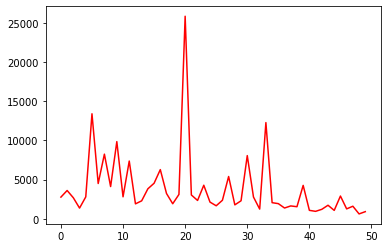

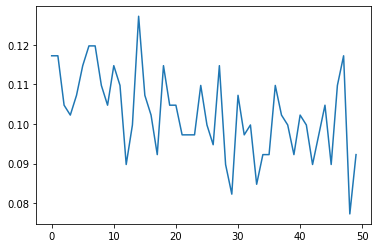

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model = Sequential()
model.add(LSTM(124, return_sequences=True, activation='LeakyReLU', input_shape=(216, 748)))
model.add(LSTM(64, return_sequences=False, activation='LeakyReLU'))
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dense(64, activation='LeakyReLU'))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer=Adam(clipvalue=1.0, learning_rate=0.000001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model = train_wrapper(model, train, train_label, epochs=50, callbacks=[tb_callback])

model.summary()

In [123]:
calculate_accuracy(model, test, test_label)

Accuracy: 0.08
Prediction time for 100 samples : 1s


,handshake,waving,yawning,walking,bowing,punching,standing,sitting,touchinghead,defending,reachingup
handshake,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
waving,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
yawning,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
walking,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
bowing,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
punching,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
standing,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
sitting,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
touchinghead,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000
defending,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000


In [124]:
calculate_accuracy(model, train, train_label)

Accuracy: 0.08977556109725686
Prediction time for 401 samples : 1s


,handshake,waving,yawning,walking,bowing,punching,standing,sitting,touchinghead,defending,reachingup
handshake,22.000000,1.000000,7.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000
waving,13.000000,3.000000,10.000000,0.000000,0.000000,0.000000,6.000000,5.000000,1.000000,0.000000,1.000000
yawning,18.000000,2.000000,4.000000,0.000000,0.000000,0.000000,4.000000,12.000000,0.000000,0.000000,0.000000
walking,7.000000,3.000000,9.000000,0.000000,0.000000,0.000000,9.000000,7.000000,0.000000,1.000000,0.000000
bowing,23.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000
punching,12.000000,3.000000,6.000000,0.000000,0.000000,0.000000,5.000000,6.000000,2.000000,0.000000,0.000000
standing,17.000000,3.000000,3.000000,0.000000,0.000000,0.000000,2.000000,10.000000,0.000000,0.000000,0.000000
sitting,22.000000,1.000000,6.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000
touchinghead,16.000000,6.000000,7.000000,0.000000,0.000000,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000
defending,15.000000,1.000000,8.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000


## Deep Neural Network

In [98]:
dataset = flatten_dataset(master_dataset, level=2)
labels  = encode_labels(master_labels)
dataset = shuffle_dataset(dataset, labels)
train, train_label, test, test_label = train_test_split(dataset, train_test_ratio = 0.8, flatten_label=False)

Train dataset shape : (401, 1, 161568)
Test dataset shape  : (100, 1, 161568)
Train label shape   : (401, 1, 11)
Test label shape    : (100, 1, 11)


Epoch 1/50
13/13 [==============================] - 1s 26ms/step - loss: 39.6684 - categorical_accuracy: 0.1122
Epoch 2/50
13/13 [==============================] - 0s 35ms/step - loss: 13.8882 - categorical_accuracy: 0.2893
Epoch 3/50
13/13 [==============================] - 1s 40ms/step - loss: 5.0540 - categorical_accuracy: 0.3641
Epoch 4/50
13/13 [==============================] - 0s 38ms/step - loss: 4.6598 - categorical_accuracy: 0.4663
Epoch 5/50
13/13 [==============================] - 0s 38ms/step - loss: 2.8199 - categorical_accuracy: 0.5087
Epoch 6/50
13/13 [==============================] - 1s 38ms/step - loss: 1.9384 - categorical_accuracy: 0.6110
Epoch 7/50
13/13 [==============================] - 0s 37ms/step - loss: 0.9605 - categorical_accuracy: 0.7357
Epoch 8/50
13/13 [==============================] - 1s 39ms/step - loss: 0.7844 - categorical_accuracy: 0.7506
Epoch 9/50
13/13 [==============================] - 1s 42ms/step - loss: 0.8281 - categorical_accuracy: 0.7606

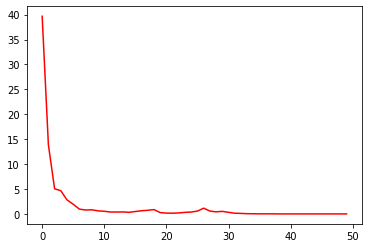

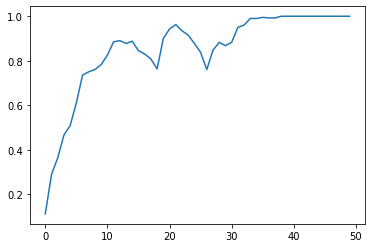

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model = Sequential()
model.add(Dense(64, activation='LeakyReLU',input_shape=(1, 161568)))
model.add(Dense(128, activation='LeakyReLU'))
model.add(Dense(64, activation='LeakyReLU'))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model = train_wrapper(model, train, train_label, epochs=50, callbacks=[tb_callback])

model.summary()

In [101]:
calculate_accuracy(model, test, test_label)

Accuracy: 0.92


,handshake,waving,yawning,walking,bowing,punching,standing,sitting,touchinghead,defending,reachingup
handshake,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
waving,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
yawning,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
walking,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
bowing,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
punching,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000
standing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
sitting,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
touchinghead,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000
defending,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000


## CNN Network

In [102]:
dataset = flatten_dataset(master_dataset, level=1)
labels  = encode_labels(master_labels)
dataset = shuffle_dataset(dataset, labels)
train, train_label, test, test_label = train_test_split(dataset, train_test_ratio = 0.8, flatten_label=True)

Train dataset shape : (401, 216, 748)
Test dataset shape  : (100, 216, 748)
Train label shape   : (401, 11)
Test label shape    : (100, 11)


Epoch 1/50
13/13 [==============================] - 51s 4s/step - loss: 3.6515 - categorical_accuracy: 0.1696
Epoch 2/50
13/13 [==============================] - 51s 4s/step - loss: 1.8925 - categorical_accuracy: 0.4239
Epoch 3/50
13/13 [==============================] - 56s 4s/step - loss: 1.2147 - categorical_accuracy: 0.6135
Epoch 4/50
13/13 [==============================] - 1927s 160s/step - loss: 0.7514 - categorical_accuracy: 0.7581
Epoch 5/50
13/13 [==============================] - 939s 4s/step - loss: 0.5303 - categorical_accuracy: 0.8504
Epoch 6/50
13/13 [==============================] - 52s 4s/step - loss: 0.3105 - categorical_accuracy: 0.9102
Epoch 7/50
13/13 [==============================] - 54s 4s/step - loss: 0.2138 - categorical_accuracy: 0.9202
Epoch 8/50
13/13 [==============================] - 52s 4s/step - loss: 0.2297 - categorical_accuracy: 0.9327
Epoch 9/50
13/13 [==============================] - 54s 4s/step - loss: 0.1665 - categorical_accuracy: 0.9476
Epoch

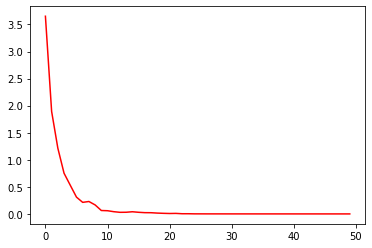

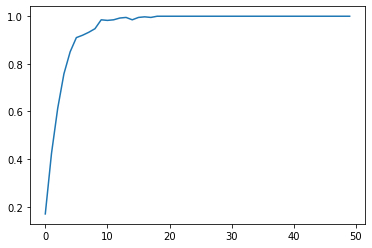

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import TensorBoard


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(216, 748, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(11, activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model = train_wrapper(model, train, train_label, epochs=50, callbacks=[tb_callback])

model.summary()

In [113]:
calculate_accuracy(model, test, test_label)

Accuracy: 0.9
Prediction time for 100 samples : 4s


,handshake,waving,yawning,walking,bowing,punching,standing,sitting,touchinghead,defending,reachingup
handshake,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
waving,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000
yawning,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
walking,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bowing,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
punching,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
standing,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000
sitting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
touchinghead,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
defending,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000


In [112]:
calculate_accuracy(model, train, train_label)

Accuracy: 1.0
Prediction time for 401 samples : 15s


,handshake,waving,yawning,walking,bowing,punching,standing,sitting,touchinghead,defending,reachingup
handshake,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
waving,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yawning,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
walking,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
bowing,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
punching,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
standing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
sitting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000
touchinghead,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,0.000000
defending,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000
